In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
df = pd.read_excel('../Data_target/counts_alta.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  80 non-null     int64
 1   people  80 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


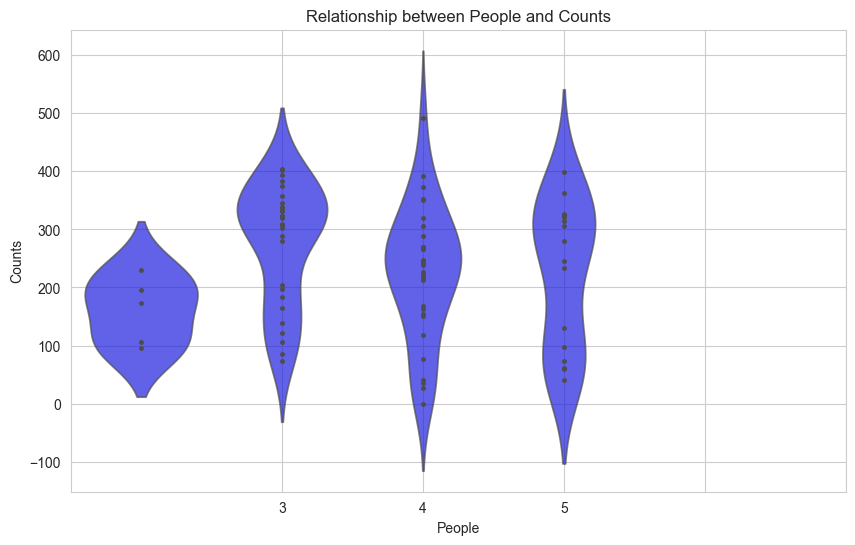

In [2]:
people = df['people']
counts = df['counts']

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x=people, y=counts, inner="point", color='blue', alpha=0.7)
plt.xlabel('People')
plt.ylabel('Counts')
plt.title('Relationship between People and Counts')
plt.xticks(range(1, 6))  # Set x-axis ticks from 1 to 5 (assuming people range from 1 to 5)
plt.grid(True)
plt.show()


C:\Users\olivi\AppData\Local\Temp\ipykernel_172720\2843262904.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = filtered_df['Date'].dt.date
C:\Users\olivi\AppData\Local\Temp\ipykernel_172720\2843262904.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Date', y='Count', data=filtered_df, inner="point", palette='Blues', alpha=0.7)


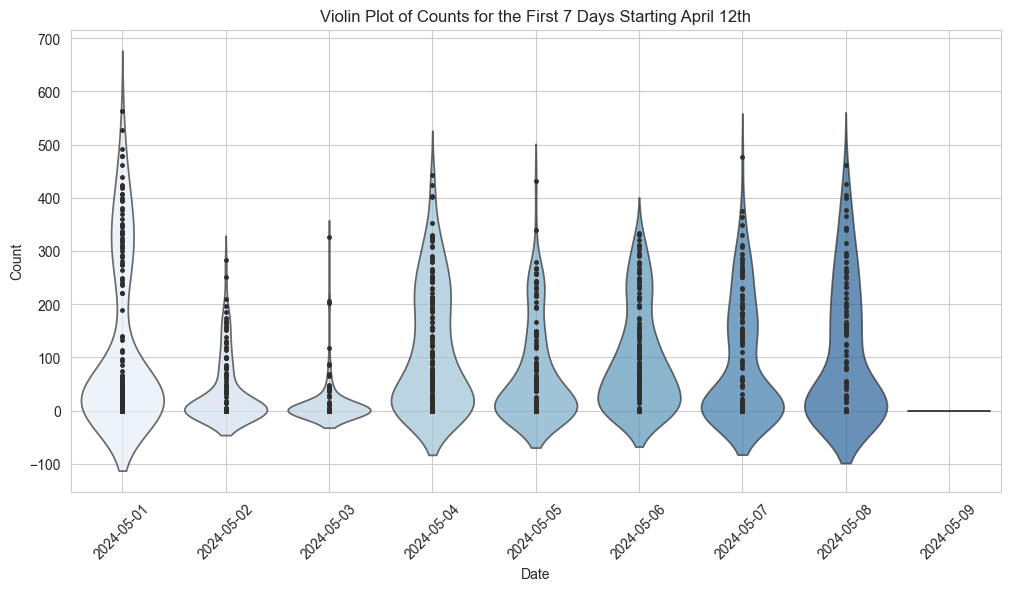

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('../Data_clean/Alta_sensors/2.P01_processed.xlsx')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the first 7 days starting from April 12th
start_date = '2024-05-01'
end_date = '2024-05-10'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("The filtered DataFrame is empty. Please check the date range and data.")
else:
    # Extract the date part from the datetime column for easier plotting
    filtered_df['Date'] = filtered_df['Date'].dt.date

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Date', y='Count', data=filtered_df, inner="point", palette='Blues', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title('Violin Plot of Counts for the First 7 Days Starting April 12th')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()


In [21]:
df['Date'].max()

Timestamp('2024-05-31 23:57:11')

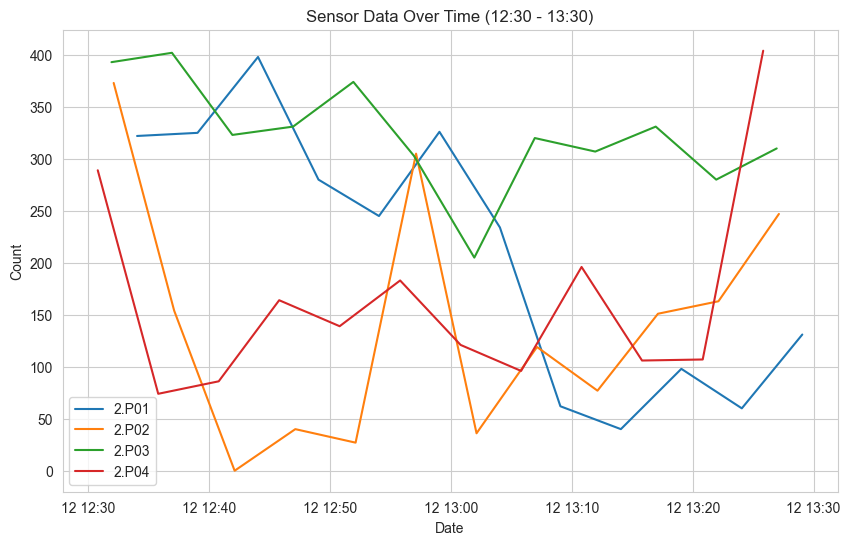

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the sensors and input folder
sensors = ['2.P01', '2.P02', '2.P03', '2.P04']
input_folder = '../Data_clean/Testing_data/Alta/'

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop through each sensor
for sensor in sensors:
    # Construct the file path
    file_path = input_folder + f'{sensor}_processed.xlsx'
    
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter the data between 12:30 and 13:30
    mask = (df['Date'].dt.time >= pd.to_datetime('12:30').time()) & (df['Date'].dt.time <= pd.to_datetime('13:30').time())
    df_filtered = df[mask]
    
    # Plot the filtered data
    plt.plot(df_filtered['Date'], df_filtered['Count'], label=sensor)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sensor Data Over Time (12:30 - 13:30)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
